In [2]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D

In [3]:
(X_train,y_train),(X_val,y_val) = tensorflow.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


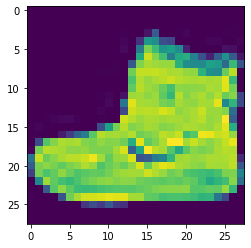

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255.0
X_val = X_val/255.0

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

In [7]:
def build_model(hp):
  model = Sequential()
  model.add(Conv2D(hp.Int('conv_1_filter',min_value=32,max_value=256,step=16),
                   hp.Choice('Kernel_1',values=[3,5]),
                   activation='relu',input_shape = (28,28,1)))
  model.add(Conv2D(hp.Int('conv_2_filter',min_value=32,max_value=256,step=16),
                   hp.Choice('Kernel_2',values=[3,5]),
                   activation='relu'))
  model.add(Flatten())
  model.add(Dense(hp.Int('dense_1_unit',min_value=32,max_value=128,step=16),
                  activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer= tensorflow.keras.optimizers.Adam(hp.Choice('learning_rate',values = [1e-2,1e-3,1e-4])),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model 



In [8]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=d40e71650b6d56fa737a48121ecb3eca9582c0244f1d49a060bf66850675b60a
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=cd921679d80fa6c1206988d33ddcffdef84d142f21e6f196aaf05d9a566952df
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [9]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [10]:
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials=5,
                    executions_per_trial=3,
                    directory='my_dir',
                    project_name='MNIST')

In [11]:
tuner.search(X_train,y_train,epochs=3,validation_data = (X_val,y_val))

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4741 - accuracy: 0.8341 - val_loss: 0.3822 - val_accuracy: 0.8606
Epoch 2/3
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3532 - accuracy: 0.8722 - val_loss: 0.3723 - val_accuracy: 0.8579
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3243 - accuracy: 0.8812 - val_loss: 0.3556 - val_accuracy: 0.8703
Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5007 - accuracy: 0.8268 - val_loss: 0.4198 - val_accuracy: 0.8428
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3613 - accuracy: 0.8673 - val_loss: 0.4053 - val_accuracy: 0.8484
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3323 - accuracy: 0.8759 - val_loss: 0.3945 - val_accuracy: 0.8660
Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4736 - accuracy: 0.8276 - val_loss: 0.4426 - val_accuracy: 0.8366

Epoch 1/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6522 - accuracy: 0.8062 - val_loss: 0.4410 - val_accuracy: 0.8410
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3845 - accuracy: 0.8566 - val_loss: 0.4243 - val_accuracy: 0.8521
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3568 - accuracy: 0.8673 - val_loss: 0.4122 - val_accuracy: 0.8533
Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7837 - accuracy: 0.8164 - val_loss: 0.4257 - val_accuracy: 0.8451
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3735 - accuracy: 0.8615 - val_loss: 0.3960 - val_accuracy: 0.8564
Epoch 3/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3448 - accuracy: 0.8723 - val_loss: 0.4206 - val_accuracy: 0.8606
Epoch 1/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.6875 - accuracy: 0.8206 - val_loss: 0.4217 - val_accuracy:

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3745 - accuracy: 0.8641 - val_loss: 0.3019 - val_accuracy: 0.8925
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2393 - accuracy: 0.9112 - val_loss: 0.2906 - val_accuracy: 0.8892
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1777 - accuracy: 0.9328 - val_loss: 0.2985 - val_accuracy: 0.9041
Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3821 - accuracy: 0.8626 - val_loss: 0.2938 - val_accuracy: 0.8949
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2411 - accuracy: 0.9107 - val_loss: 0.2714 - val_accuracy: 0.9000
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1823 - accuracy: 0.9317 - val_loss: 0.2618 - val_accuracy: 0.9081
Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3757 - accuracy: 0.8629 - val_loss: 0.3152 - val_accuracy:

Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3628 - accuracy: 0.8693 - val_loss: 0.2885 - val_accuracy: 0.8953
Epoch 2/3
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2231 - accuracy: 0.9188 - val_loss: 0.2814 - val_accuracy: 0.9021
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1600 - accuracy: 0.9403 - val_loss: 0.2331 - val_accuracy: 0.9197
Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3798 - accuracy: 0.8642 - val_loss: 0.3050 - val_accuracy: 0.8880
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2409 - accuracy: 0.9114 - val_loss: 0.2651 - val_accuracy: 0.9055
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1826 - accuracy: 0.9317 - val_loss: 0.2554 - val_accuracy: 0.9106
Epoch 1/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3789 - accuracy: 0.8629 - val_loss: 0.2953 - val_accuracy

Epoch 1/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3865 - accuracy: 0.8606 - val_loss: 0.3063 - val_accuracy: 0.8892
Epoch 2/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2440 - accuracy: 0.9101 - val_loss: 0.2875 - val_accuracy: 0.8937
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1874 - accuracy: 0.9302 - val_loss: 0.2670 - val_accuracy: 0.9102
Epoch 1/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3868 - accuracy: 0.8613 - val_loss: 0.3370 - val_accuracy: 0.8814
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2509 - accuracy: 0.9085 - val_loss: 0.2887 - val_accuracy: 0.8935
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1900 - accuracy: 0.9294 - val_loss: 0.2849 - val_accuracy: 0.9031
Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3836 - accuracy: 0.8623 - val_loss: 0.3359 - val_accuracy:

INFO:tensorflow:Oracle triggered exit


In [14]:
model = tuner.get_best_models(num_models=1)[0]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 192)       1920      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 240)       414960    
_________________________________________________________________
flatten (Flatten)            (None, 138240)            0         
_________________________________________________________________
dense (Dense)                (None, 48)                6635568   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                490       
Total params: 7,052,938
Trainable params: 7,052,938
Non-trainable params: 0
_________________________________________________________________
